In [1]:
import numpy as np
import pandas as pd

# data.csv saved in the same folder as ipynb file.

data = pd.read_csv('data.csv', sep =',')
# data.head()
data.head()
data.dtypes

Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object

In [2]:
# Shows the basic statistics of the data

data.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [3]:
# isnull() gives true or false for each record. true if null and false if not null.
# In order to just know if the dataframe as a whole has any null values, we get values which produces a 2D array 
# and any() gives if any of the values are true.

data.isnull().values.any()

True

In [4]:
# Replace the null values with the mean. inplace=True will update the dataframe as well. 
# inplace=True Makes the changes permanent.

data.fillna(data.mean(), inplace=True)

# Checking if we still have null values after replacement.
data.isnull().values.any()

False

In [5]:
# I am selecting the columns Duration and Calories.
# Grouping by duration and calculating the min, max, count, and mean for Calories.

data_groupby = data.groupby('Duration').agg({'Calories': ['min', 'max', 'count', 'mean']})
data_groupby


Calories                           
              min     max count         mean
Duration                                    
15           50.5   124.2     2    87.350000
20           50.3   229.4     9   151.600000
25          244.2   244.2     1   244.200000
30           86.2   319.2    16   192.125000
45          100.7   406.0    35   279.096585
60          215.2   486.0    79   341.046465
75          320.4   330.4     2   325.400000
80          643.1   643.1     1   643.100000
90          466.4   700.0     8   541.800000
120         500.0  1000.1     3   666.833333
150         816.0  1115.0     4   939.400000
160         853.0  1034.4     2   943.700000
180         600.1   800.4     3   733.600000
210        1376.0  1860.4     2  1618.200000
270        1729.0  1729.0     1  1729.000000
300        1500.2  1500.2     1  1500.200000

In [6]:
data[(data.Calories>500) & (data.Calories<1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [7]:
data[(data.Calories>500) & (data.Pulse<100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [8]:
df_modified = data.loc[:, data.columns!='Maxpulse']
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [9]:
# Using the drop function to drop. axis =1 to let the function know that we need to delete from columns
# inplace=true to make it a permanent delete

data.drop('Maxpulse', axis = 1, inplace=True)
data.columns # Displaying the columns after the delete

Index(['Duration', 'Pulse', 'Calories'], dtype='object')

In [10]:
print("Data types before convert:\n", data.dtypes)
data['Calories'] = data['Calories'].astype(int)

print("\nData types after convert:\n", data.dtypes)

Data types before convert:
 Duration      int64
Pulse         int64
Calories    float64
dtype: object

Data types after convert:
 Duration    int64
Pulse       int64
Calories    int64
dtype: object


<AxesSubplot:xlabel='Duration', ylabel='Calories'>

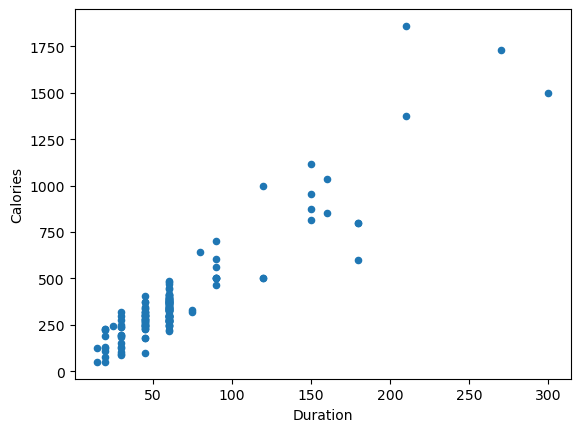

In [11]:
data.plot.scatter(x='Duration', y='Calories')

In [12]:
# Downloaded the glass.csv

glass_df = pd.read_csv('glass.csv')
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [13]:
from sklearn.model_selection import train_test_split

X = glass_df.iloc[:, :-1].values
y = glass_df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=0)

In [14]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Classification Report from Naive Bayes classifier is : \n", classification_report(y_test, y_pred))

print("\naccuracy with Naive Bayes clasifier is: ", accuracy_score(y_pred, y_test))

Classification Report from Naive Bayes classifier is : 
               precision    recall  f1-score   support

           1       0.19      0.44      0.27         9
           2       0.33      0.16      0.21        19
           3       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.37        43
   macro avg       0.42      0.47      0.42        43
weighted avg       0.40      0.37      0.36        43


accuracy with Naive Bayes clasifier is:  0.37209302325581395


In [15]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

print("Classification Report from Naive Bayes classifier is : \n", classification_report(y_test, y_pred_svm))

print("\naccuracy with Naive Bayes clasifier is: ", accuracy_score(y_pred_svm, y_test))

Classification Report from Naive Bayes classifier is : 
               precision    recall  f1-score   support

           1       0.21      1.00      0.35         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.21        43
   macro avg       0.03      0.17      0.06        43
weighted avg       0.04      0.21      0.07        43


accuracy with Naive Bayes clasifier is:  0.20930232558139536


<AxesSubplot:xlabel='RI', ylabel='Na'>

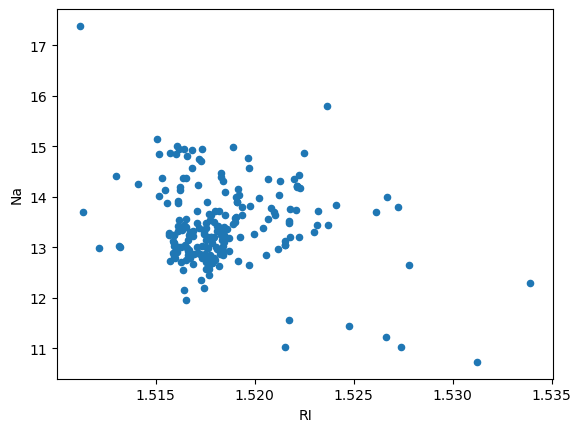

In [173]:
# Using scatter plot
# Using the columns RI and Na in scatter plot to show the correlation

glass_df.plot.scatter(x='RI', y='Na')

(array([ 41.91,  73.84, 917.75, 422.78, 278.14,  73.94,  37.94,  41.  ,
         13.3 ,  16.19]),
 array([1.51115 , 1.513428, 1.515706, 1.517984, 1.520262, 1.52254 ,
        1.524818, 1.527096, 1.529374, 1.531652, 1.53393 ]),
 <BarContainer object of 10 artists>)

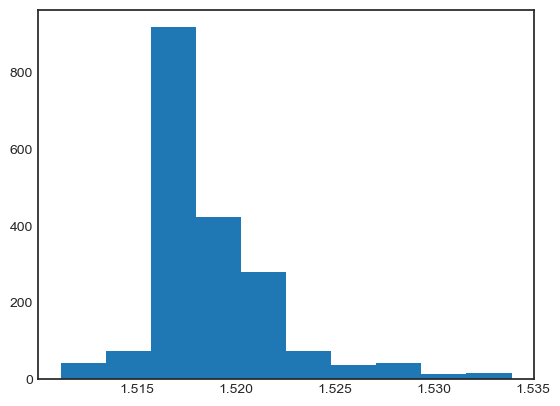

In [189]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.style.use('seaborn-white')
#glass_df.plot(x='RI', y='Na')
plt.hist(glass_df.RI, weights=glass_df.Ca)